# Using Python for Research Homework: Week 4, Case Study 2

In this case study, we will continue taking a look at patterns of flight for each of the three birds in our dataset.

In [1]:
# DO NOT EDIT THIS CODE
import pandas as pd
import numpy as np
birddata = pd.read_csv("https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@bird_tracking.csv", index_col=0)
birddata.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


### Exercise 1

In this case study, we will continue taking a look at patterns of flight for each of the three birds in our dataset. We will group the flight patterns by bird and date, and plot the mean altitude for these groupings.

`pandas` makes it easy to perform basic operations on groups within a dataframe without needing to loop through each value in the dataframe. In this exercise, we will group the dataframe by `birdname` and then find the average `speed_2d` for each bird.

#### Instructions 
- Fill in the code to find the mean altitudes of each bird using the pre-loaded `birddata` dataframe. 

In [3]:
# First, use `groupby()` to group the data by "bird_name".
grouped_birds = birddata.groupby('bird_name')

# Now calculate the mean of `speed_2d` using the `mean()` function.
mean_speeds = grouped_birds.speed_2d.mean()

# Find the mean `altitude` for each bird.
mean_altitudes = grouped_birds.altitude.mean()

### Exercise 2

In this exercise, we will group the flight times by date and calculate the mean altitude within that day.

#### Instructions 
- Convert `birddata.date_time` to the `pd.datetime` format, and store as `birddata["date"]`.
- Fill in the code to find the mean altitudes for each day.

In [2]:
type(birddata.date_time)

pandas.core.series.Series

In [4]:
type(pd.to_datetime(birddata.date_time))


pandas.core.series.Series

In [5]:
import datetime as dt

# Convert birddata.date_time to the `pd.datetime` format.
birddata.date_time = pd.to_datetime(birddata.date_time)

# Create a new column of day of observation
birddata['date'] = birddata.date_time.dt.date

# Use `groupby()` to group the data by date.
grouped_bydates = birddata.groupby('date')

# Find the mean `altitude` for each date.
mean_altitudes_perday = grouped_bydates.altitude.mean()

In [6]:
mean_altitudes_perday.index

Index([2013-08-15, 2013-08-16, 2013-08-17, 2013-08-18, 2013-08-19, 2013-08-20,
       2013-08-21, 2013-08-22, 2013-08-23, 2013-08-24,
       ...
       2014-04-21, 2014-04-22, 2014-04-23, 2014-04-24, 2014-04-25, 2014-04-26,
       2014-04-27, 2014-04-28, 2014-04-29, 2014-04-30],
      dtype='object', name='date', length=259)

In [7]:
mean_altitudes_perday


date
2013-08-15    134.092000
2013-08-16    134.839506
2013-08-17    147.439024
2013-08-18    129.608163
2013-08-19    180.174797
                 ...    
2014-04-26     15.118012
2014-04-27     23.897297
2014-04-28     37.716867
2014-04-29     19.244792
2014-04-30     13.954545
Name: altitude, Length: 259, dtype: float64

### Exercise 3

In this exercise, we will group the flight times by both bird and date, and calculate the mean altitude for each.

#### Instructions 
- `birddata` already contains the `date` column. To find the average speed for each bird and day, create a new grouped dataframe called `grouped_birdday` that groups the data by both `bird_name` and date.

In [8]:
birddata.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,date
0,71,2013-08-15 00:18:08+00:00,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15
1,68,2013-08-15 00:48:07+00:00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15
2,68,2013-08-15 01:17:58+00:00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15
3,73,2013-08-15 01:47:51+00:00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15
4,69,2013-08-15 02:17:42+00:00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15


In [10]:
# Use `groupby()` to group the data by bird and date.
grouped_birdday = birddata.groupby(['bird_name', 'date'])
grouped_daybird = birddata.groupby(['date', 'bird_name'])

# Find the mean `altitude` for each bird and date.
mean_altitudes_perday = grouped_birdday.altitude.mean()
# grouped_daybird.altitude.mean()
mean_altitudes_perday

bird_name  date      
Eric       2013-08-15     74.988095
           2013-08-16    127.773810
           2013-08-17    125.890244
           2013-08-18    121.353659
           2013-08-19    134.928571
                            ...    
Sanne      2014-04-26     17.116667
           2014-04-27     17.391892
           2014-04-28     58.876712
           2014-04-29     30.530120
           2014-04-30      4.361111
Name: altitude, Length: 770, dtype: float64

### Exercise 4

Great! Now find the average speed for each bird and day.

#### Instructions 

- Store these are three `pandas` `Series` objects, one for each bird.
- Use the plotting code provided to plot the average speeds for each bird.

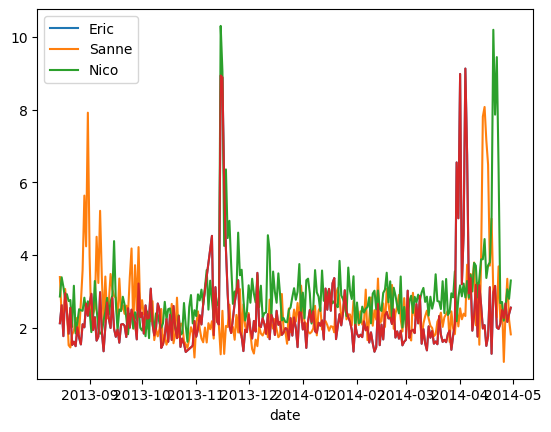

In [12]:
import matplotlib.pyplot as plt

eric_daily_speed  = grouped_birdday.speed_2d.mean().Eric
sanne_daily_speed = grouped_birdday.speed_2d.mean().Sanne
nico_daily_speed  = grouped_birdday.speed_2d.mean().Nico

# eric_daily_speed.plot(label='Eric')
plt.plot(eric_daily_speed, label='Eric')
sanne_daily_speed.plot(label='Sanne')
nico_daily_speed.plot(label='Nico')
plt.plot(eric_daily_speed)
plt.legend(loc='upper left')
plt.show()

In [13]:
mean_altitudes_perday['Eric']['2013-08-15']

KeyError: '2013-08-15'